In [21]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

data = pd.read_csv("submetering.csv",delimiter=',')
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d %H:%M:%S")
data.set_index("Date",inplace=True)

data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16 17:00:00,4.587,0.484,234.367,19.700,0.0,1.333,16.833
2006-12-16 17:30:00,4.150,0.178,234.699,17.780,0.0,0.367,16.867
2006-12-16 18:00:00,3.945,0.085,235.185,16.967,0.0,11.400,16.967
2006-12-16 18:30:00,3.320,0.075,233.976,14.233,0.0,2.033,16.767
2006-12-16 19:00:00,3.464,0.050,233.754,14.747,0.0,1.833,16.767
...,...,...,...,...,...,...,...
2010-11-26 19:00:00,1.591,0.072,237.261,6.693,0.0,0.000,0.000
2010-11-26 19:30:00,1.727,0.048,236.221,7.420,0.0,0.133,0.000
2010-11-26 20:00:00,1.357,0.088,239.817,5.747,0.0,1.300,0.000


In [22]:
ts = data['Global_active_power']

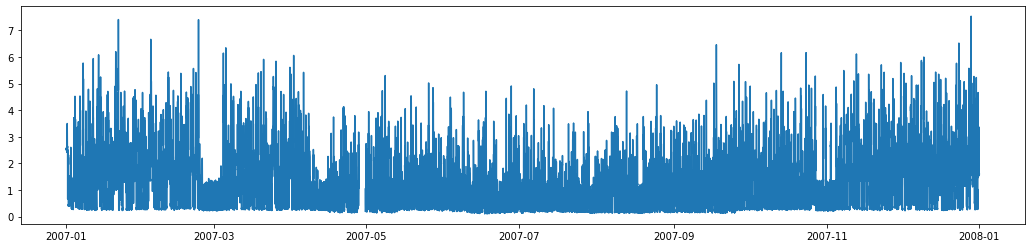

In [29]:
plt.figure(figsize=(18,4))
ts2006 = ts['2007']
plt.plot(ts2006)

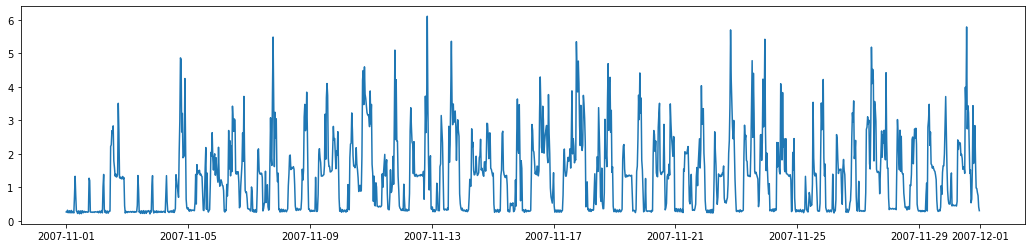

In [32]:
plt.figure(figsize=(18,4))
ts200711 = ts['2007-11']
plt.plot(ts200711)

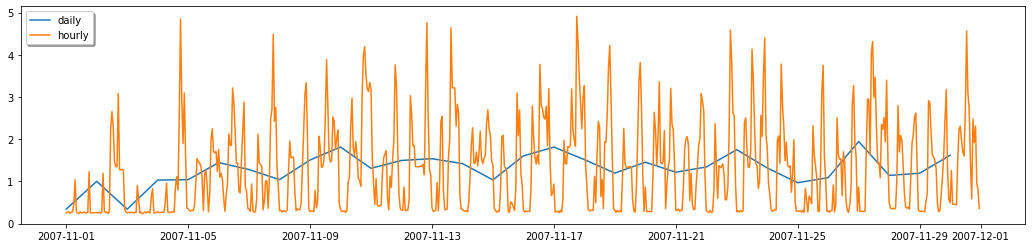

In [40]:
plt.figure(figsize=(18,4))
legend = ["daily", "hourly"]

ts_day = ts200711.resample('d').mean()
ts_hour = ts200711.resample('H').mean()
plt.plot(ts_day)
plt.plot(ts_hour)
plt.legend(legend, loc='best', fancybox=True, shadow=True)


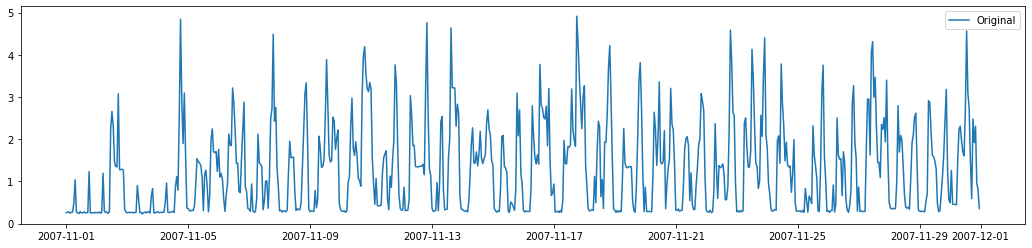

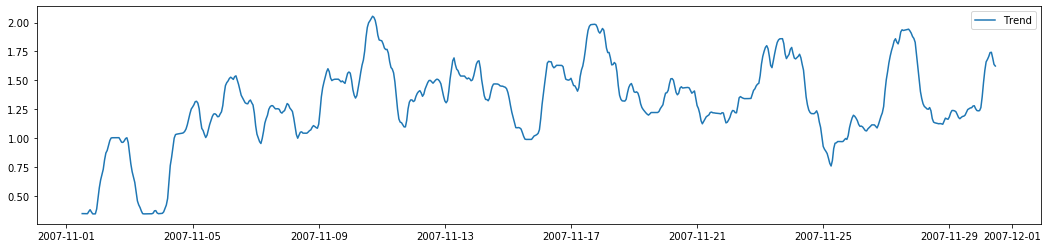

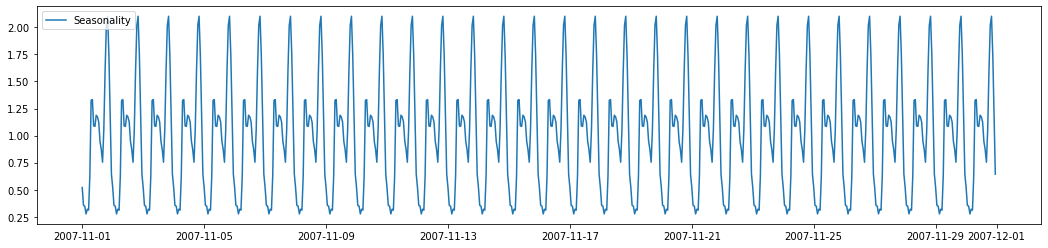

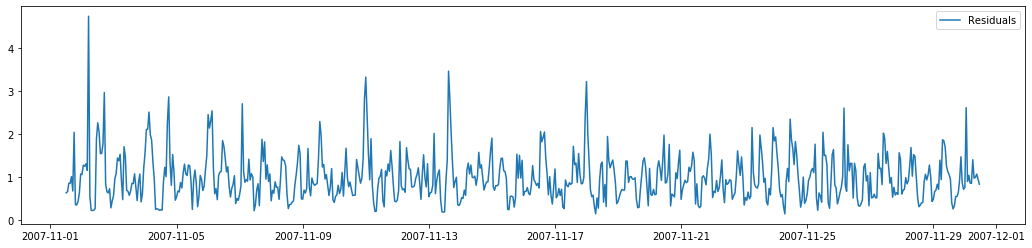

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_log = np.log(ts_hour)
ts_log = ts_hour


decomposition = seasonal_decompose(ts_log, model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#plt.subplot(411)
plt.figure(figsize=(18,4))
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.show()
#plt.subplot(412)
plt.figure(figsize=(18,4))
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.show()
#plt.subplot(413)
plt.figure(figsize=(18,4))
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.show()
#plt.subplot(414)
plt.figure(figsize=(18,4))
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.show()
#plt.tight_layout()

# Forecasting

In [65]:
ts = np.log(ts_log)
#ts = ts_log
l = len(ts)
print(l)

720


In [66]:
#index = round(l*0.9)
train=ts[0:-10] 
test=ts[-10:]

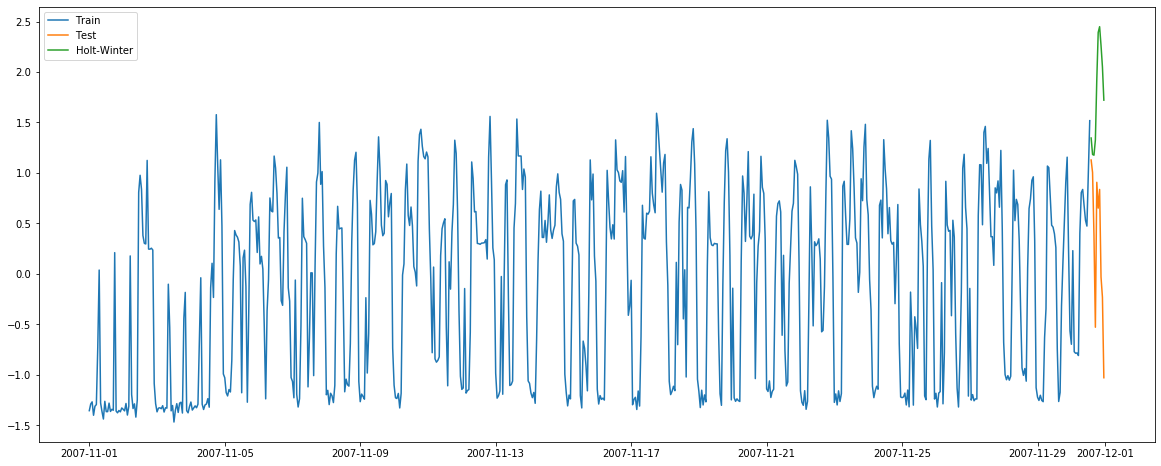

In [68]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fithw = ExponentialSmoothing(np.asarray(train),
                            seasonal_periods=12, trend='add', seasonal='add').fit()
series = fithw.forecast(len(test))
y_hat_hw = pd.Series(series, test.index)

plt.figure(figsize=(20,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_hw, label='Holt-Winter')
plt.legend(loc='best')
plt.show()